# Practice Quantum Gates

In [1]:
%matplotlib inline
import numpy as np
from functools import reduce
from math import log
import itertools

# Useful Functions

## Qubit Representations

In [2]:
zero_qubit=np.matrix('1; 0')
one_qubit=np.matrix('0; 1')
plus_qubit=1/np.sqrt(2)*np.matrix('1; 1')
minus_qubit=1/np.sqrt(2)*np.matrix('1; -1')
clockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[np.complex(0,1)]])    
counterclockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[-np.complex(0,1)]])

## Quantum State 

In [3]:
def create_quantum_state(qubits):
    return reduce(lambda x,y:np.kron(x,y),qubits)

## Quantum Measurement

In [4]:
def measure_in_01_basis(state):
    from random import random
    n_qubits=int(log(state.shape[0],2))
    probabilities=[(coeff*coeff.conjugate()).real for coeff in state.flat]
    rand=random()
    for idx,state_desc in enumerate([''.join(map(str,state_desc)) for state_desc in itertools.product([0, 1], repeat=n_qubits)]):
        if rand < sum(probabilities[0:(idx+1)]):
            return '|"%s">' % state_desc

## The Bloch Sphere

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def get_bloch_coordinates(qubit):
    def get_x_bloch(qubit):
        qubit_x_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*qubit 
        prob_zero_qubit=(qubit_x_basis.item(0)*qubit_x_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_x_basis.item(1)*qubit_x_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit

    def get_y_bloch(qubit):
        qubit_y_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*np.matrix([[1,0],[0,-np.complex(0,1)]])*qubit
        prob_zero_qubit=(qubit_y_basis.item(0)*qubit_y_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_y_basis.item(1)*qubit_y_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit

    def get_z_bloch(qubit):
        qubit_z_basis=qubit
        prob_zero_qubit=(qubit_z_basis.item(0)*qubit_z_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_z_basis.item(1)*qubit_z_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
    return (get_x_bloch(qubit),get_y_bloch(qubit),get_z_bloch(qubit))

def plot_bloch(qubit,color='b',ax=None):
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # draw sphere
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_wireframe(x, y, z, color="k",alpha=.1)
        ax.grid(False)

    coordinates=get_bloch_coordinates(qubit)
    ax.quiver([0],[0],[0],[coordinates[0]],[coordinates[1]],[coordinates[2]],length=1,color=color,arrow_length_ratio=0.3)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xlabel('x: |"-"> to |"+">')
    ax.set_ylabel('y: |"↺"> to |"↻">')
    ax.set_zlabel('z: |"1"> to |"0">')
    ax.view_init(azim=20)
    return ax


## Quantum State

In [6]:
def create_quantum_state(qubits):
    return reduce(lambda x,y:np.kron(x,y),qubits)

In [7]:
register_01=create_quantum_state([zero_qubit,one_qubit])

In [8]:
def get_nqubits_quantum_state(state):
    return int(log(state.size,2))


## Quantum Measurement 

In [9]:
def measure_in_01_basis(state):
    from random import random
    n_qubits=int(log(state.shape[0],2))
    probabilities=[(coeff*coeff.conjugate()).real for coeff in state.flat]
    rand=random()
    for idx,state_desc in enumerate([''.join(map(str,state_desc)) for state_desc in itertools.product([0, 1], repeat=n_qubits)]):
        if rand < sum(probabilities[0:(idx+1)]):
            return '|"%s">' % state_desc
    

# Different Quantum Gates

### Identity Gate, $I$
The identity gate leaves the qubit unchanged, and thus in the same position on the Bloch Sphere.

In [10]:
identity_gate=np.eye(2,2)
print(np.array_equal(zero_qubit,identity_gate*zero_qubit))
print(np.array_equal(one_qubit,identity_gate*one_qubit))


True
True


### Useful definition

In [11]:
i_=np.complex(0,1)

### One qubit gates

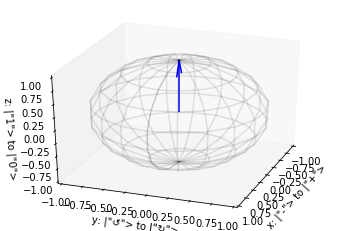

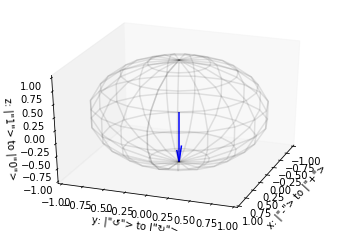

In [12]:
plot_bloch(zero_qubit)
plot_bloch(one_qubit)

#### Hadamard gate, $H$
This gate rotates the qubit by $180^\circ$ around the x-axis then $90^\circ$ about the y-axis. 

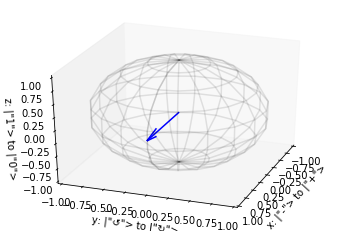

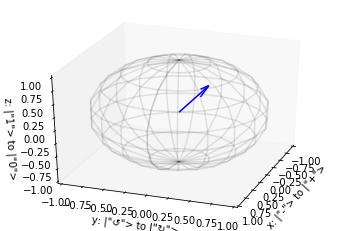

In [13]:
H=1./np.sqrt(2)*np.matrix('1 1; 1 -1') 
plot_bloch(H*zero_qubit)
plot_bloch(H*one_qubit)

#### Pauli gates, $X, Y, Z$
Each of these gates does a $180^\circ$ flip of the qubit with respect to a different basis/axis on the Bloch sphere

In [14]:
X=np.matrix('0 1; 1 0')
Y=np.matrix([[0, -i_],[i_, 0]])
Z=np.matrix([[1,0],[0,-1]])

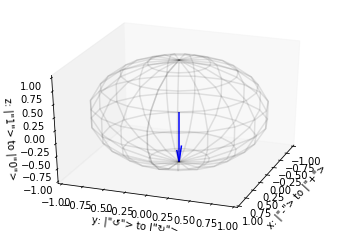

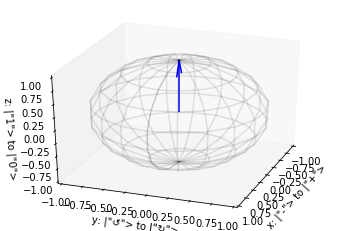

In [15]:
plot_bloch(X*zero_qubit)
plot_bloch(X*one_qubit)

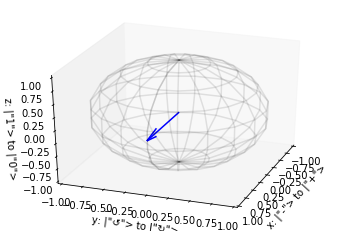

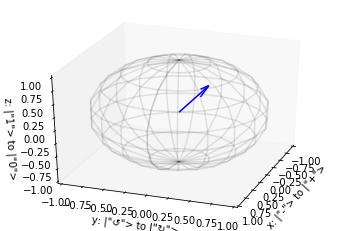

In [16]:
plot_bloch(plus_qubit)
plot_bloch(Y*plus_qubit)

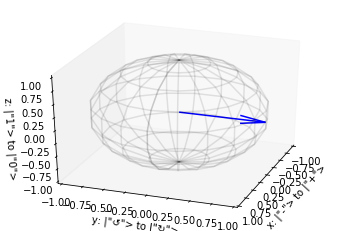

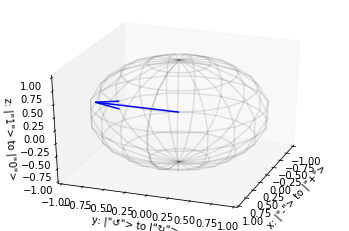

In [17]:
plot_bloch(clockwisearrow_qubit)
plot_bloch(Z*clockwisearrow_qubit)

#### Phase gate, $S$

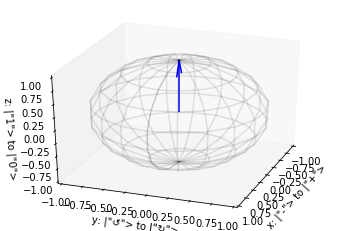

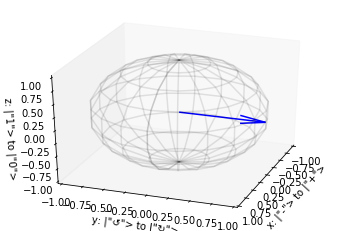

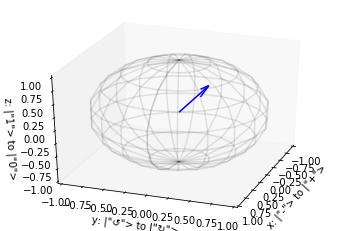

In [18]:
S=np.matrix([[1,0],[0,np.e**(i_*np.pi/2.)]])

plot_bloch(S*zero_qubit)
plot_bloch(S*plus_qubit)
plot_bloch(S*S*plus_qubit)

#### $\pi/8$ gate, $T$


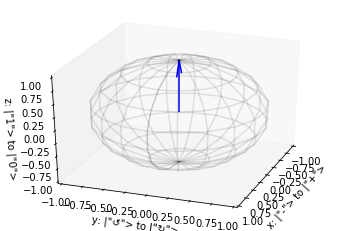

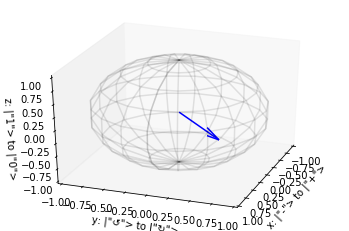

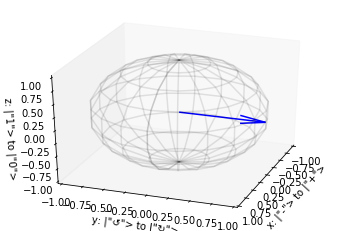

In [19]:
T=np.matrix([[1,0],[0, np.e**(i_*np.pi/4.)]])
plot_bloch(S*zero_qubit)
plot_bloch(T*plus_qubit)
plot_bloch(T*T*plus_qubit)

# Dagger gates $\dagger$

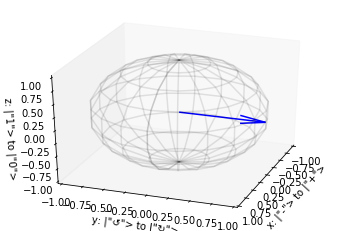

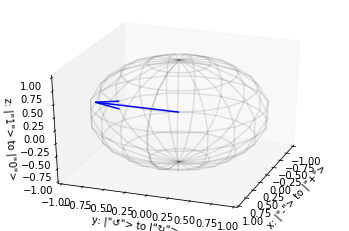

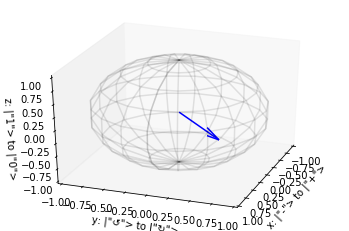

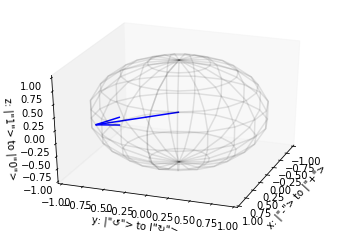

In [20]:
Sdagger = S.conjugate().transpose()
Tdagger= T.conjugate().transpose()
plot_bloch(S*plus_qubit)
plot_bloch(Sdagger*plus_qubit)
plot_bloch(T*plus_qubit)
plot_bloch(Tdagger*plus_qubit)

### Two qubit gates
#### Helper function to print probability table for state

In [21]:
def probability_table_in_01_basis(state,n_measurements=1000):
    from collections import Counter
    measured=[measure_in_01_basis(final_state) for i in range(n_measurements)]
    for s,c in Counter(measured).items():
        print(s,"{0:.0%}".format(c/n_measurements))

#### CNOT Gate

In [22]:
CNOT=np.matrix('1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0')
starting_state=create_quantum_state([plus_qubit,zero_qubit])
final_state=CNOT*starting_state
probability_table_in_01_basis(final_state)

|"11"> 48%
|"00"> 52%
